## Variables for BDT
Let's plot the variables which may have the potential to distinguish between tttt and tt events:
- $p_T$.
- $Nj$
- $H_T^b$
- $H_T^{rat}$
- Third-highest CSV

In [26]:
import os
import time

import hist
import json
import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import ratio_uncertainty
import matplotlib as mpl
import numpy as np
import pickle
from collections import OrderedDict


In [27]:
with open("histograms.pkl", "rb") as f:
    h2 = pickle.load(f)
    print(h2.keys())

dict_keys(['third_highest_csv', 'htrat', 'nbjets', 'muon_pt', 'jets_pt', 'nmuons', 'htb', 'muon_eta', 'njets', 'jets_eta'])


In [28]:
### list of bkgs to plot
dictBkgs = OrderedDict()
dictBkgs["ttbar"] = { "color" : "red", "label" : "$t\\bar{t}$" }

bkgs = list(dictBkgs.keys())[::-1]
print(bkgs)
bkgs_colors = [ col["color"] for i, col in dictBkgs.items() ]
print(bkgs_colors)
bkgs_label = [ col["label"] for i, col in dictBkgs.items() ]

['ttbar']
['red']


In [29]:
### Run this cell twice to load the CMS style properly
def plotHisto( histName = "muon_pt", xlabel = "Leading Muon $p_{T}$ [GeV]", rebinFactor = 7, 
                  xmin = 20j, xmax = 300j, mcFactor = 0.05, xlog=False):

    data = h2[histName][ xmin:xmax:hist.rebin(rebinFactor), "data", "nominal"]
    hists = [] 
    tot = data.copy()
    tot.reset()
    for ibkg in bkgs:
        hists.append( (mcFactor*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), ibkg, "nominal"]) )
        tot += (mcFactor*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), ibkg, "nominal"])
    signal = 20*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), "tttt", "nominal"]
    

    fig, (ax, rax) = plt.subplots(2, 1, gridspec_kw=dict(height_ratios=[3, 1], hspace=0.03), sharex=True)
    hep.cms.label("Open Data", ax=ax, data=True, lumi=2.26, year=2015) #, rlabel="2.3 $\mathrm{fb^{-1}}$, 2015 (8 TeV)")
    plt.style.use(hep.style.CMS)

    hep.histplot(data, ax=ax, histtype='errorbar', color='k', capsize=4, yerr=True, label="Data")
    hep.histplot(hists, ax=ax, stack=True, histtype='fill',color=["red"],label=bkgs)
    hep.histplot(signal, ax=ax, histtype='step', color='lightgray', label="$ \\bar{t}t \\bar{t} (x20) $")

    errps = {'hatch':'////', 'facecolor':'none', 'lw': 0, 'color': 'k', 'alpha': 0.4}
    ax.stairs(
        values=tot.values() + np.sqrt(tot.values()),
        baseline=tot.values() - np.sqrt(tot.values()),
        edges=data.axes[0].edges, **errps, label='Stat. unc.')
    ax.set_yscale("log")
    ax.set_ylim(0.1, 10e7)
    ax.legend()
    ax.set_ylabel(f"Events / {rebinFactor}")
    
    yerr = ratio_uncertainty(data.values(), tot.values(), 'poisson')
    rax.stairs(1+yerr[1], edges=tot.axes[0].edges, baseline=1-yerr[0], **errps)
    #hep.histplot(data.values()/tot.values(), tot.axes[0].edges, yerr=np.sqrt(data.values())/tot.values(),
    #    ax=rax, histtype='errorbar', color='k', capsize=4, label="Data")
    
    # Set the number of y ticks
    ax.set_yticks([1e-1,1,1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8])
    
    # Set the number of x ticks
    if histName == "muon_pt":
        ax.set_xticks([20, 50, 100, 150, 200, 250, 300])
        
    if histName == "njets":
        ax.set_xticks([6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
        
    if histName == "htb":
        ax.set_xticks([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])


    rax.axhline(1, ls='--', color='k')
    ### more labels
    plt.xlabel(xlabel)
    plt.ylabel("(Data - MC)/MC")
    plt.show()

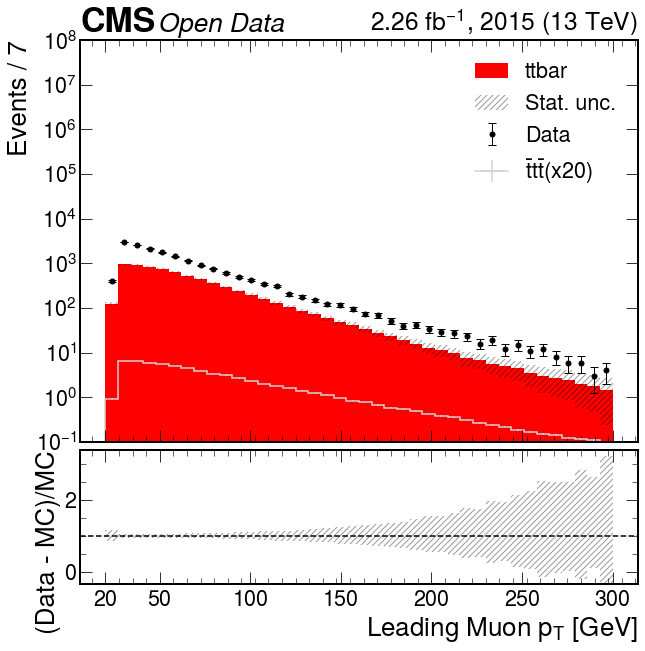

In [69]:
plotHisto(xlog=True)

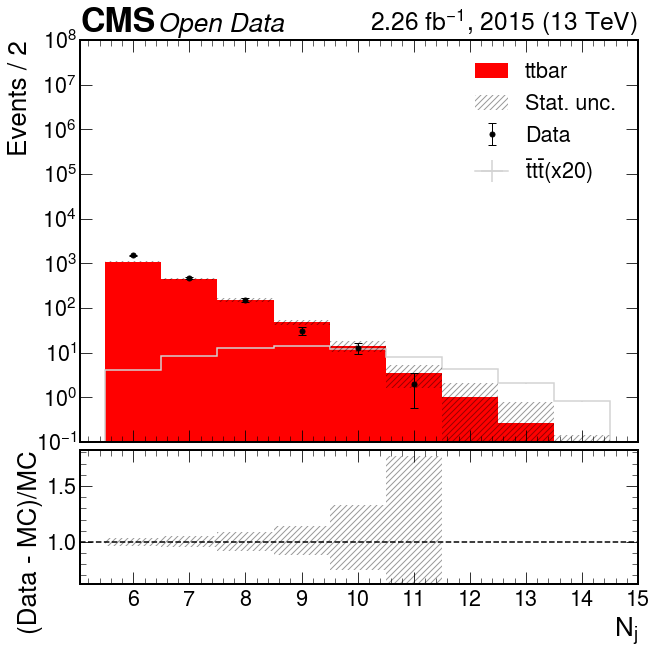

In [70]:
plotHisto(histName = "njets", xlabel = "$N_j$", rebinFactor = 2, xmin = 5.5j, xmax = 14.5j, mcFactor = 0.05)

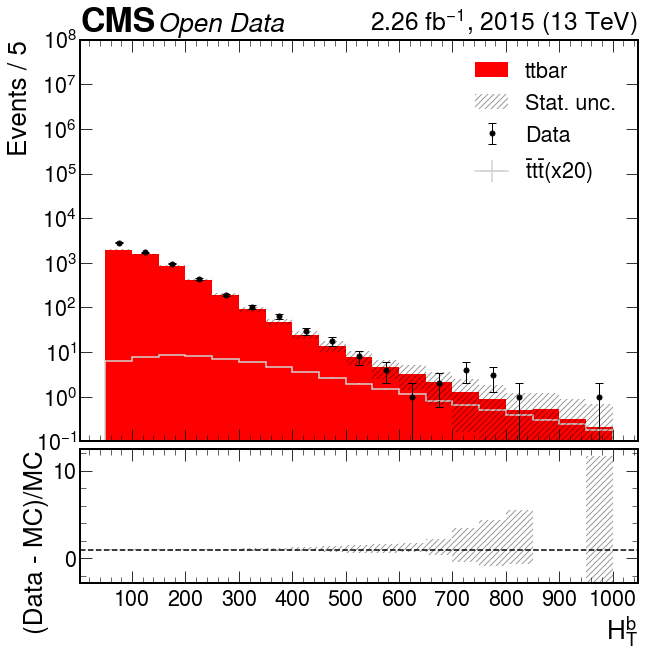

In [71]:
plotHisto(histName = "htb", xlabel = "$H_T^b$", rebinFactor = 5, xmin = 50j, xmax = 1000j, mcFactor = 0.05)

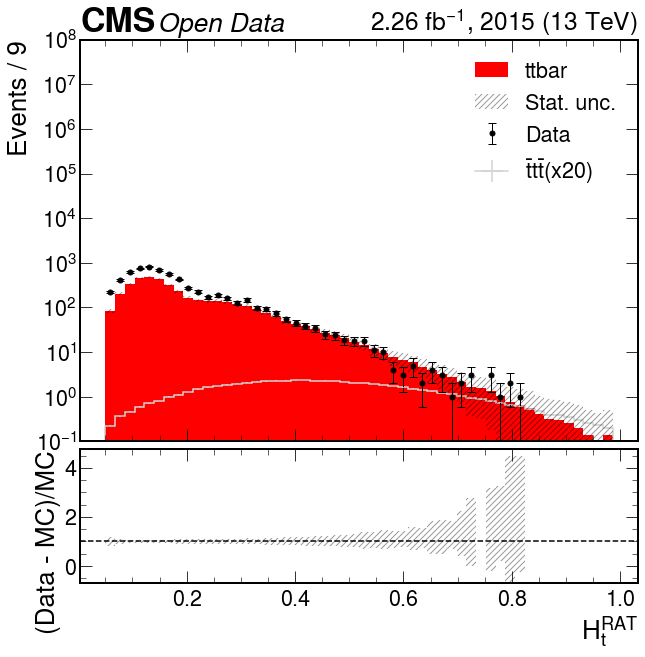

In [39]:
plotHisto(histName = "htrat", xlabel = "$H_T^{RAT}$", rebinFactor = 9, xmin = 0.05j, xmax = 1j, mcFactor = 0.05)

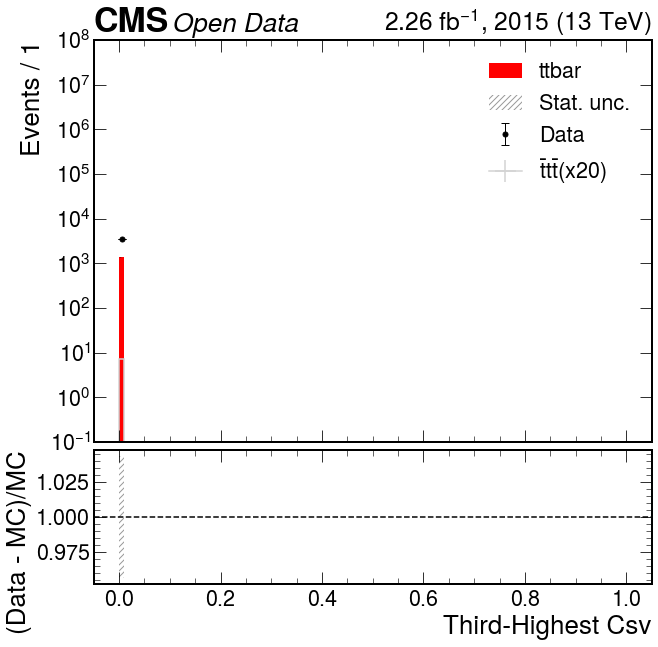

In [40]:
plotHisto(histName = "third_highest_csv", xlabel = "Third-Highest Csv", rebinFactor = 1, xmin = 0j, xmax = 1j, mcFactor = 0.05)

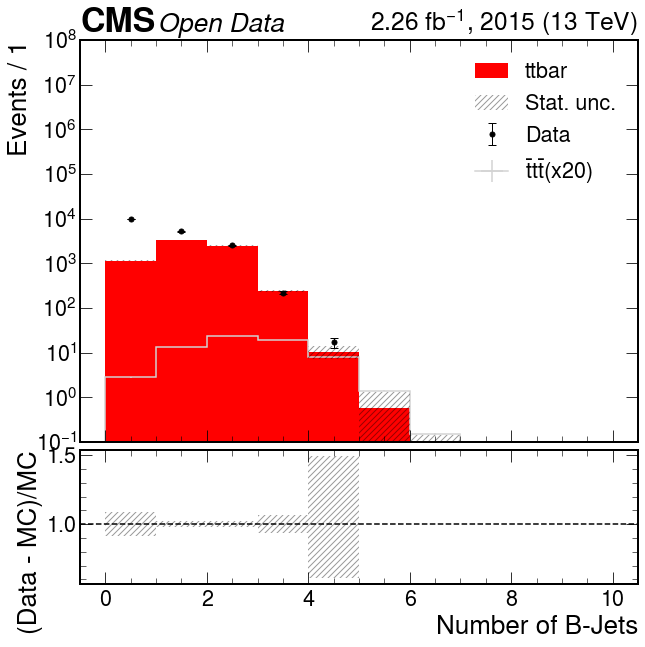

In [19]:
plotHisto(histName = "nbjets", xlabel = "Number of B-Jets", rebinFactor = 1, xmin = 0j, xmax = 10j, mcFactor = 0.05)